#### Data descriptions - CAMELS dataset

- gauge_id: Identifier for each catchment.
- p_mean: Mean precipitation (mm/day).
- pet_mean: Mean potential evapotranspiration (mm/day).
- p_seasonality: Seasonality index of precipitation.
- frac_snow: Fraction of precipitation falling as snow.
- aridity: Aridity index (PET/P).
- high_prec_freq: Frequency of high precipitation events.
- high_prec_dur: Duration of high precipitation events.
- high_prec_timing: Season when high precipitation occurs.
- low_prec_freq: Frequency of low precipitation events.
- low_prec_dur: Duration of low precipitation events.
- low_prec_timing: Season when low precipitation occurs.

In [227]:
import pandas as pd
import numpy as np

def climate_data():
    with open('../dataset/camels_clim.txt', 'r') as file:
        lines = file.readlines()
        header = lines[0].rstrip().split(';')
        data = lines[1:]
        conv_data = []
        for h in header:
            conv_data.append([])
        for line in data:
            for i, el in enumerate(line.rstrip().split(';')):
                conv_data[i].append(el)

        data_dic = {}
        for i, el in enumerate(header):
            data_dic[header[i]] = conv_data[i]
        df = pd.DataFrame.from_dict(data_dic)
        df['p_mean'] = df['p_mean'].astype(float)
        return df


def location_data():
    with open('../dataset/camels_topo.txt', 'r') as file:
        lines = file.readlines()
        header = lines[0].rstrip().split(';')
        data = lines[1:]
        conv_data = []
        for h in header:
            conv_data.append([])
        for line in data:
            for i, el in enumerate(line.rstrip().split(';')):
                conv_data[i].append(el)

        data_dic = {}
        for i, el in enumerate(header):
            data_dic[header[i]] = conv_data[i]
        df = pd.DataFrame.from_dict(data_dic)
        for col in df.columns:
            if col != 'gauge_id':
                df[col] = df[col].astype(float)
        return df

    
df = climate_data()
df_loc = location_data()        

In [228]:
df['gauge_lon'] = df_loc['gauge_lon']
df['gauge_lat'] = df_loc['gauge_lat']
features = df.drop(['gauge_id', 'gauge_lon', 'gauge_lat'], axis=1)



In [229]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

le = LabelEncoder()

categorical_features = ['high_prec_timing', 'low_prec_timing']

# Encode categorical variables
for col in categorical_features:
    features[col] = le.fit_transform(features[col])

print(features.head())




     p_mean          pet_mean       p_seasonality          frac_snow  \
0  3.126679  1.97155451060917   0.187940258706929  0.313440357191799   
1  3.608126  2.11925594798084  -0.114529586491395  0.245259009248271   
2  3.274405  2.04359356605065  0.0473581892739792   0.27701840295357   
3  3.522957  2.07132369609856   0.104090599122482  0.291836473001958   
4  3.323146  2.09002387405886   0.147775613761867  0.280118126940736   

             aridity high_prec_freq     high_prec_dur  high_prec_timing  \
0   0.63055865946247          12.95  1.34895833333333                 3   
1  0.587356423405076          20.55  1.20527859237537                 3   
2  0.624111385131731          17.15  1.20774647887324                 3   
3  0.587950340389816           18.9  1.14893617021277                 3   
4  0.628929335570973           20.1  1.16521739130435                 3   

  low_prec_freq      low_prec_dur  low_prec_timing  
0         202.2   3.4271186440678                2  
1        2

In [230]:
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

features_scaled = pd.DataFrame(scaled, columns=features.columns)

# we can drop categorical features how the clusters change
features_scaled = features_scaled.drop(['high_prec_timing', 'low_prec_timing'], axis=1)

In [231]:
features_scaled

,p_mean,pet_mean,p_seasonality,frac_snow,aridity,high_prec_freq,high_prec_dur,high_prec_timing,low_prec_freq,low_prec_dur,low_prec_timing
0,-0.092979,-1.471099,0.434922,0.668697,-0.692624,-1.757220,-0.004599,1.793770,-1.494685,-0.790312,0.322435
1,0.248621,-1.204759,-0.138985,0.333053,-0.762873,-0.083887,-0.756521,1.793770,-0.598398,-0.716773,-0.539533
2,0.011837,-1.341196,0.168181,0.489398,-0.703108,-0.832483,-0.743606,1.793770,-1.112802,-0.763055,-1.401501
3,0.188191,-1.291192,0.275825,0.562345,-0.761907,-0.447176,-1.051379,1.793770,-0.777941,-0.775760,-1.401501
4,0.046420,-1.257471,0.358713,0.504658,-0.695274,-0.182965,-0.966174,1.793770,-0.534276,-0.707552,-1.401501
...,...,...,...,...,...,...,...,...,...,...,...
666,1.220428,0.603793,-1.811197,-0.572763,-0.698040,-1.283843,2.232711,-1.122917,-0.911885,0.293834,-0.539533
667,0.912223,-0.919173,-1.479770,-0.006240,-0.902796,-1.360904,0.503662,-1.122917,-1.134176,0.020150,-0.539533
668,2.156759,-0.636026,-1.728107,-0.725626,-1.089295,-1.393930,0.614913,-1.122917,-1.014481,0.089756,-0.539533
669,-0.337768,0.969822,-1.791539,-0.177734,0.225817,-0.105904,2.282718,-1.122917,0.162520,0.438133,-0.539533


In [232]:
from sklearn.decomposition import PCA

# Reducing to 2 components for help in visualization
pca = PCA(n_components=2)  
features_pca = pca.fit_transform(features_scaled)

# create data frame with pricipial components
features_pca_df = pd.DataFrame(data=features_pca, columns=['PC1', 'PC2'])

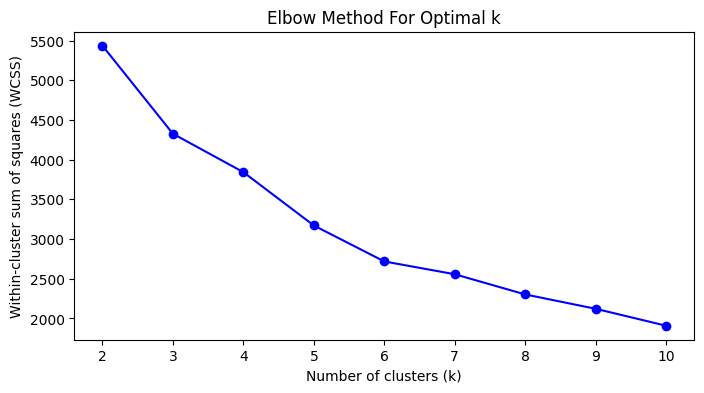

In [233]:
# Using Elbow Method to find optimal number of clusters

# Within-cluster sum of squares
wcss = []  

# Trying number of clusters from 2 to 10
K = range(2, 11)  

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.show()


In [234]:
# optimal number of clusters seems to be 4 based on the above graph
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(features_scaled)

# Add cluster labels to the original DataFrame
df['KMeans_Cluster'] = kmeans_labels


In [235]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(features_scaled, kmeans_labels)
print(f'Silhouette Score for K-Means Clustering with k={optimal_k}: {silhouette_avg}')


Silhouette Score for K-Means Clustering with k=4: 0.21209960718497178


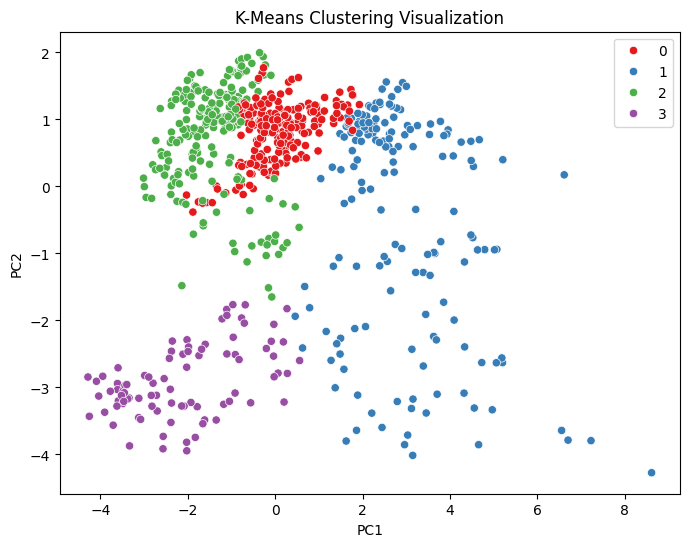

In [236]:
# Visualize clusters using the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue=kmeans_labels, data=features_pca_df, palette='Set1')
plt.title('K-Means Clustering Visualization')
plt.show()


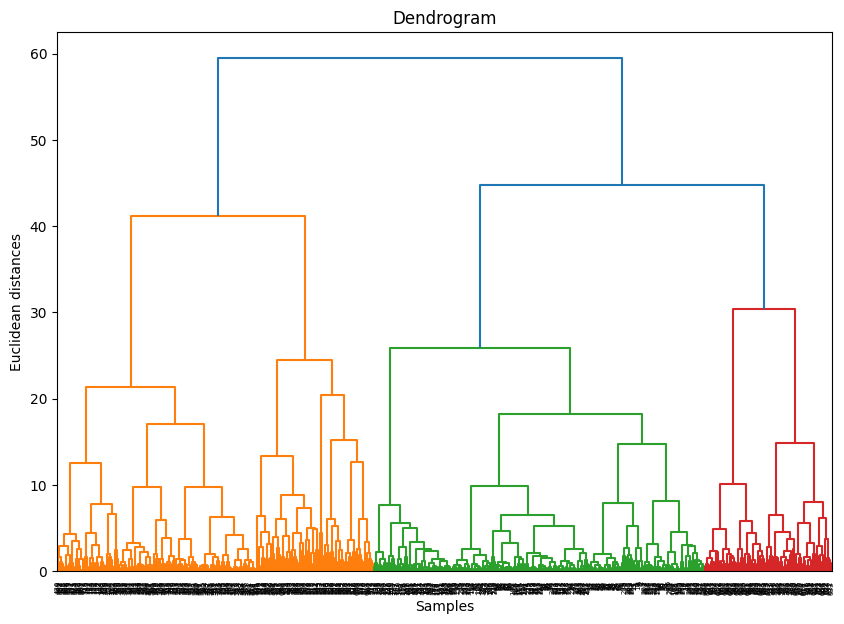

In [237]:
# Use linkage method for hierarchical clustering
linked = linkage(features_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()


In [238]:
# Decide the number of clusters (e.g., 4)
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(features_scaled)

# Add cluster labels to the DataFrame
df['Hierarchical_Cluster'] = hc_labels


In [239]:
# Calculate Silhouette Score
silhouette_avg_hc = silhouette_score(features_scaled, hc_labels)
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_avg_hc}')


Silhouette Score for Hierarchical Clustering: 0.2807751731216238


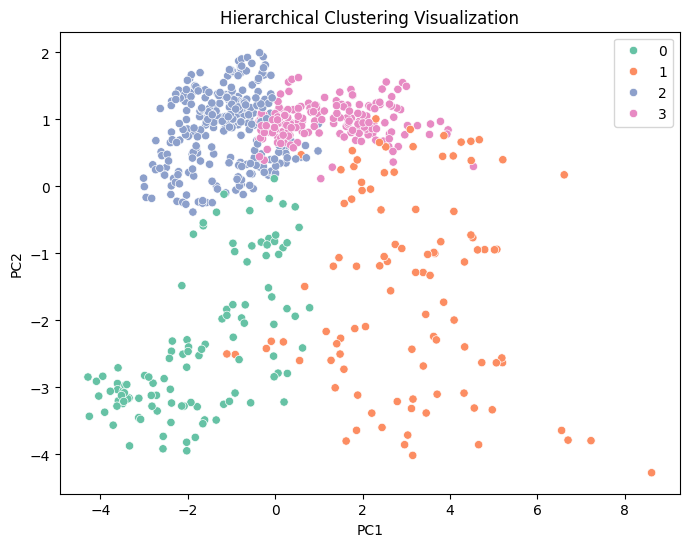

In [240]:
# Visualize clusters using the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue=hc_labels, data=features_pca_df, palette='Set2')
plt.title('Hierarchical Clustering Visualization')
plt.show()


Here we will use grid search to find the optimum values of hyperparameters for the dbscan clustering algorithm.

In [241]:
from tqdm import tqdm
import itertools

eps_values = np.arange(0.1, 5.1, 0.1)  # Adjust based on data
min_samples_values = range(5, 51, 5)   # Adjust based on data

best_score = -1
best_eps = None
best_min_samples = None
best_num_clusters = None

results = []

total_combinations = len(eps_values) * len(min_samples_values)

for eps, min_samples in tqdm(itertools.product(eps_values, min_samples_values), total=total_combinations, desc="Grid Search for DBSCAN"):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(features_scaled)
    
    # Calculate number of clusters (excluding noise)
    n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    
    if n_clusters > 1:
        try:
            silhouette_avg = silhouette_score(features_scaled, dbscan_labels)
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples
                best_num_clusters = n_clusters
        except:
            silhouette_avg = None
    else:
        silhouette_avg = None

    if silhouette_avg is not None and silhouette_avg > 0.25 and n_clusters > 3:
        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'num_clusters': n_clusters,
            'silhouette_score': silhouette_avg
        })


Grid Search for DBSCAN: 100%|█████████████████| 500/500 [00:06<00:00, 76.20it/s]


In [242]:
results

[{'eps': np.float64(1.7000000000000002),
  'min_samples': 10,
  'num_clusters': 4,
  'silhouette_score': np.float64(0.2598197591429001)},
 {'eps': np.float64(1.8000000000000003),
  'min_samples': 15,
  'num_clusters': 4,
  'silhouette_score': np.float64(0.252007148521565)}]

In [219]:
# Using eps and min_samples from above grid search for 4 clusters.

dbscan = DBSCAN(eps=1.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(features_scaled)

n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f'Number of clusters found by DBSCAN: {n_clusters_dbscan}')

if n_clusters_dbscan > 1:
    silhouette_avg_dbscan = silhouette_score(features_scaled, dbscan_labels)
    print(f'Silhouette Score for DBSCAN Clustering: {silhouette_avg_dbscan}')
else:
    print('Silhouette Score cannot be calculated with less than 2 clusters.')


# Add cluster labels to the DataFrame
df['DBSCAN_Cluster'] = dbscan_labels


Number of clusters found by DBSCAN: 4
Silhouette Score for DBSCAN Clustering: 0.2902146209407052


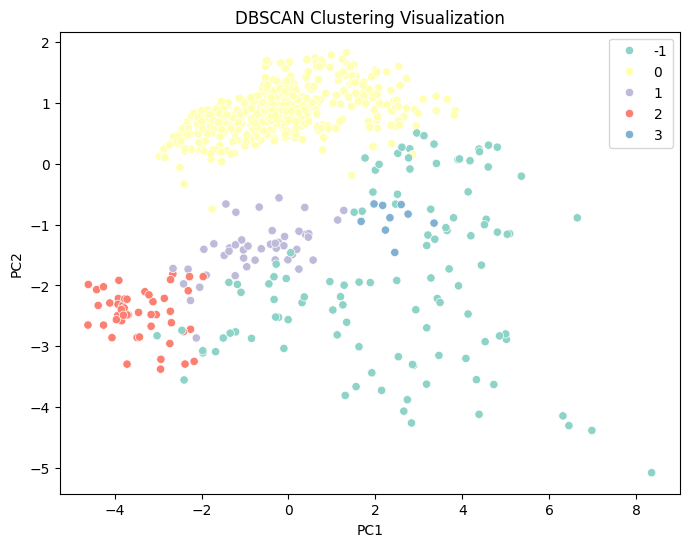

In [220]:
# Visualize clusters using the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue=dbscan_labels, data=features_pca_df, palette='Set3')
plt.title('DBSCAN Clustering Visualization')
plt.show()


In [221]:
# You can now compare the clusters formed by different algorithms
# For example, see how many stations are in each cluster for K-Means
print(df['KMeans_Cluster'].value_counts())

# Similarly for Hierarchical Clustering
print(df['Hierarchical_Cluster'].value_counts())

# And for DBSCAN
print(df['DBSCAN_Cluster'].value_counts())


KMeans_Cluster
2    401
1    148
0     64
3     58
Name: count, dtype: int64
Hierarchical_Cluster
2    383
3    131
0    110
1     47
Name: count, dtype: int64
DBSCAN_Cluster
 0    458
-1    111
 2     47
 1     46
 3      9
Name: count, dtype: int64


In [222]:
# hemogenetic or non-hemogenetic metrics for clustering

In [253]:
import matplotlib.pyplot as plt
import seaborn as sns

# For mapping
import geopandas as gpd
from shapely.geometry import Point

# Ignore warnings (optional)
import warnings
warnings.filterwarnings('ignore')

# except Alaska and Hawaii
def plotMap(df, cluster):
    if 'gauge_lat' not in df.columns or 'gauge_lon' not in df.columns:
        print("Error: The dataset must include 'latitude' and 'longitude' columns.")
    else:
        # Proceed with clustering and mapping
        pass
        
    # Convert DataFrame to GeoDataFrame
    geometry = [Point(xy) for xy in zip(df['gauge_lon'], df['gauge_lat'])]
    geo_df = gpd.GeoDataFrame(df, geometry=geometry)
    
    fig, ax = plt.subplots(figsize=(20, 25))  # Increase figsize to make the map larger
   
    us_map = gpd.read_file('../dataset/cb_2018_us_state_500k/cb_2018_us_state_500k.shp')

    # Plot the US map with a light gray color for the states
    us_map.plot(ax=ax, color='lightgray', edgecolor='black')
    
    # Plot the stations on top of the US map, coloring them by cluster label
    geo_df.plot(ax=ax, column= cluster, cmap='Set1', markersize=50, legend=True)
    
    # Set axes limits to focus on the continental US
    ax.set_xlim([-130, -65])  # Longitude limits from West to East
    ax.set_ylim([24, 50])     # Latitude limits from South to North
    
    
    # Customize the plot
    plt.title('Stations Clusters Mapped on US Map')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    
    # Show the plot
    plt.show()


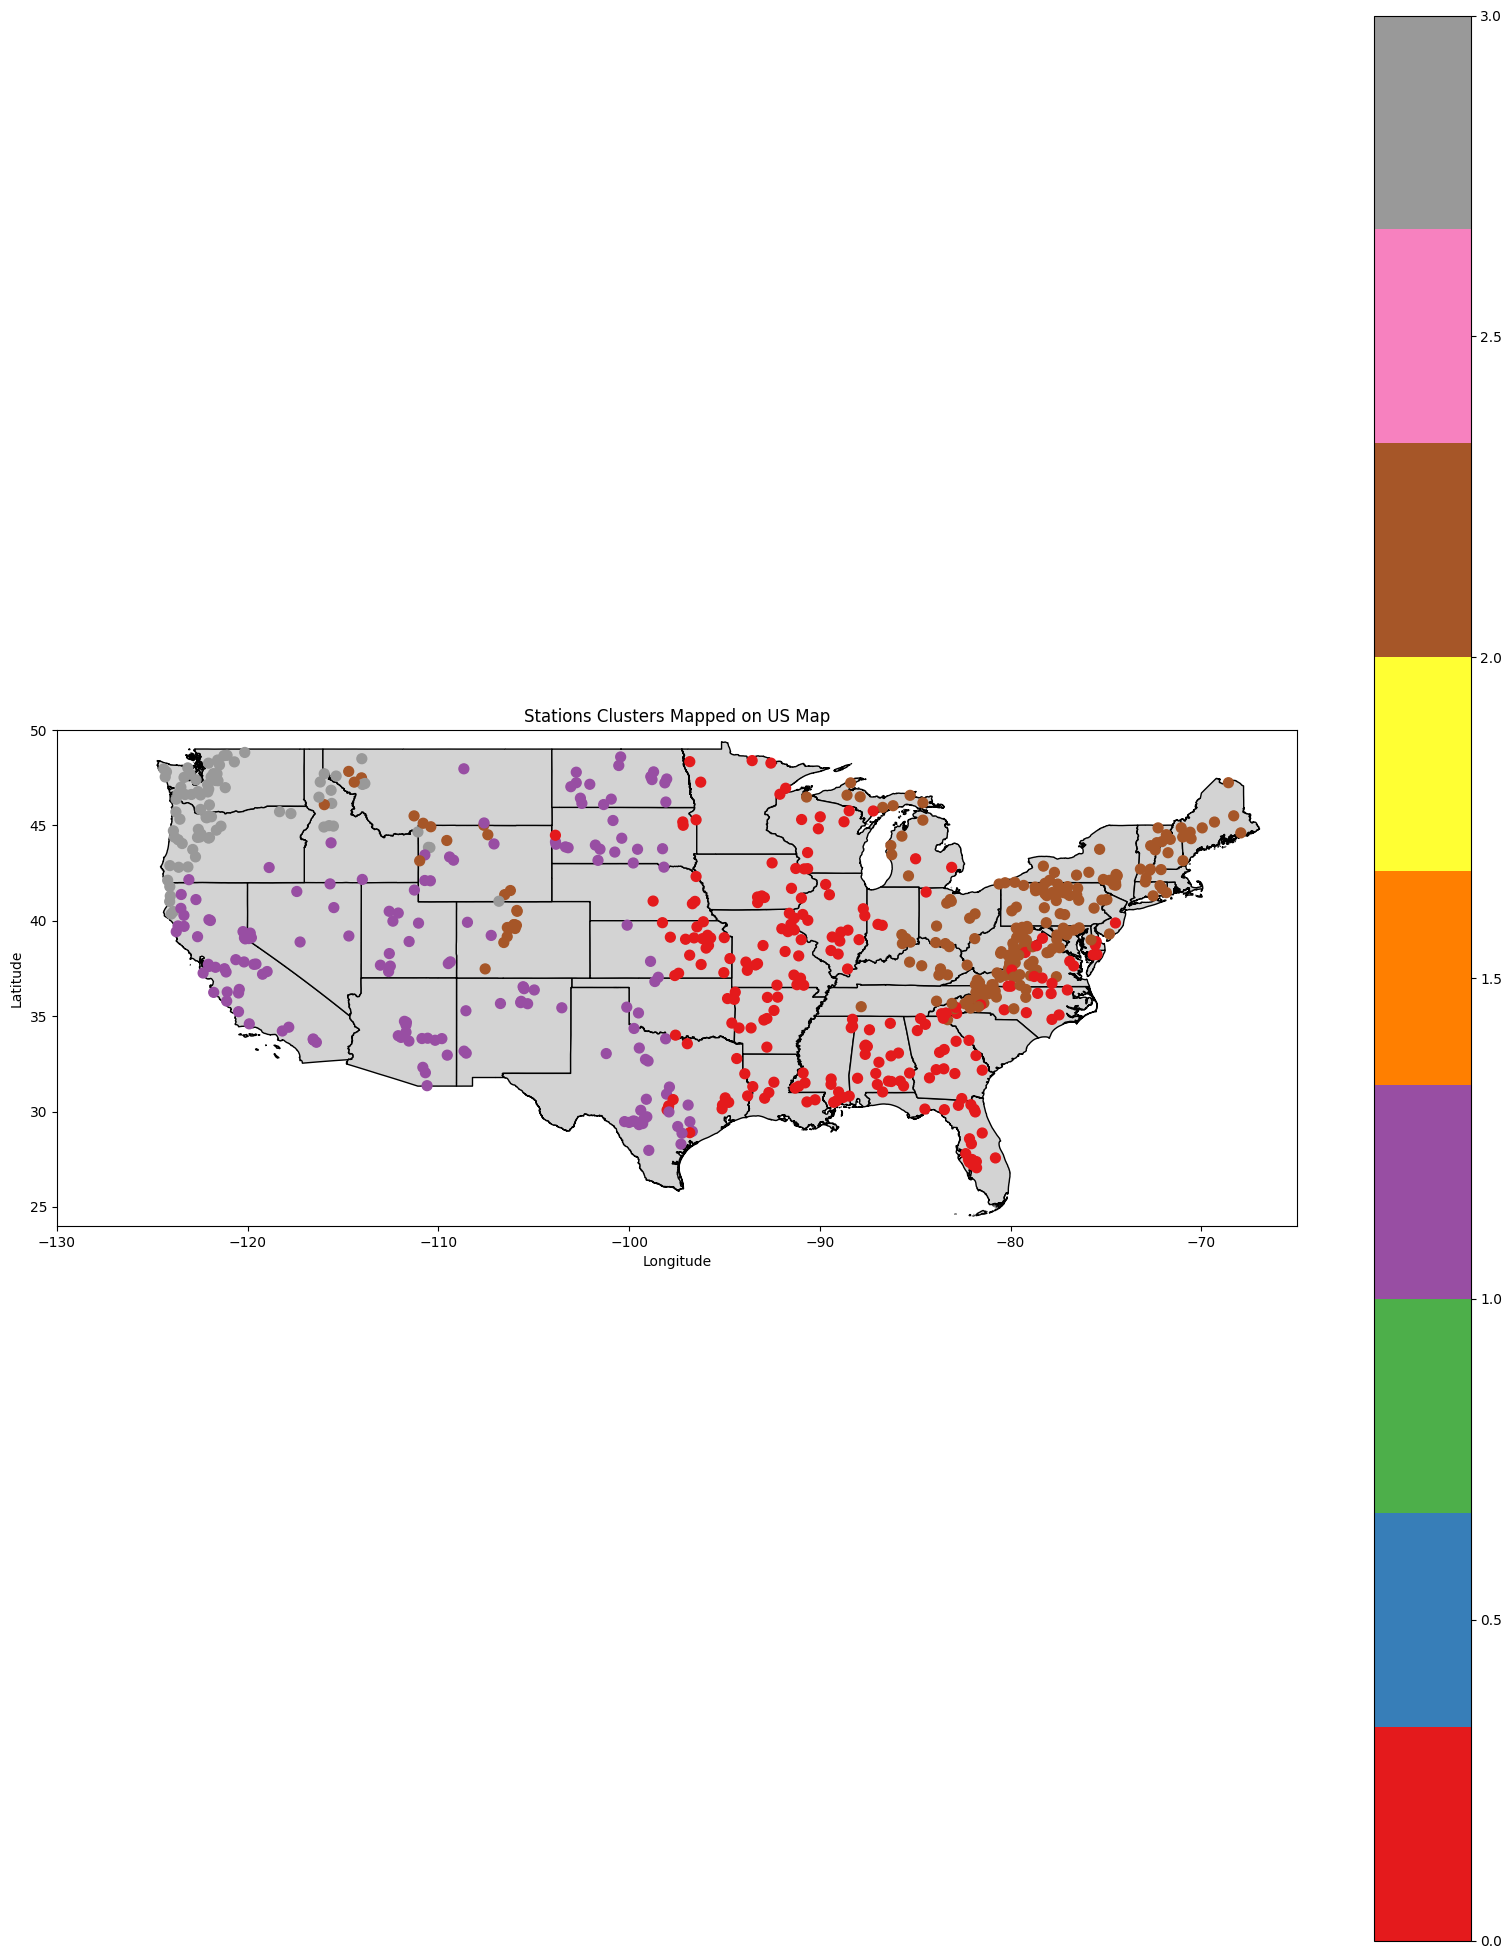

In [254]:
plotMap(df, 'KMeans_Cluster')

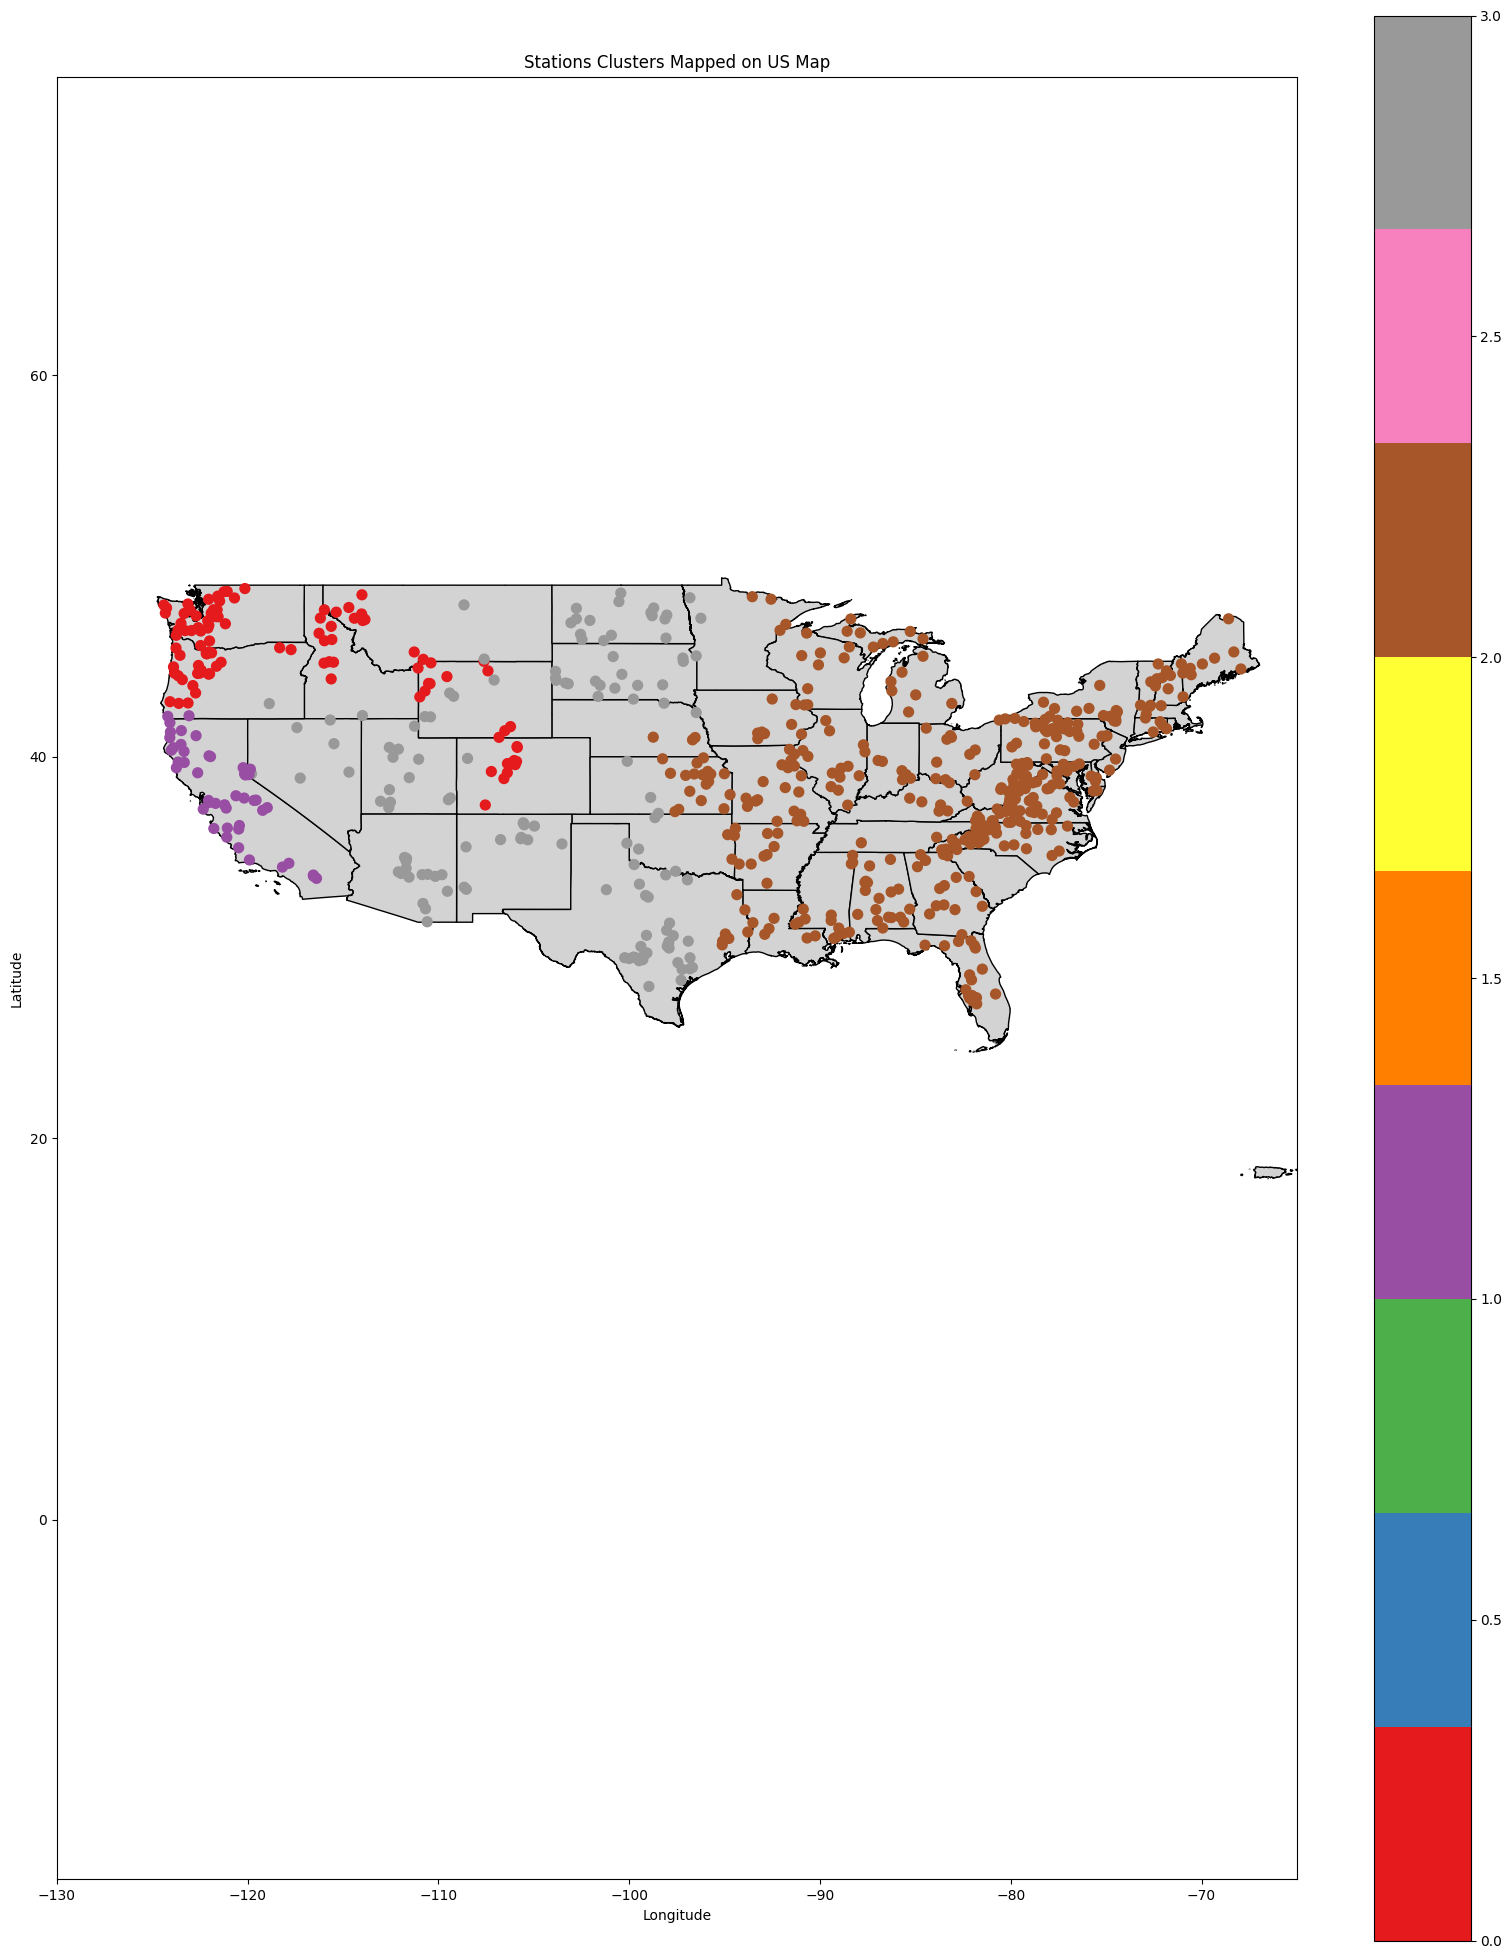

In [225]:
plotMap(df, 'Hierarchical_Cluster')

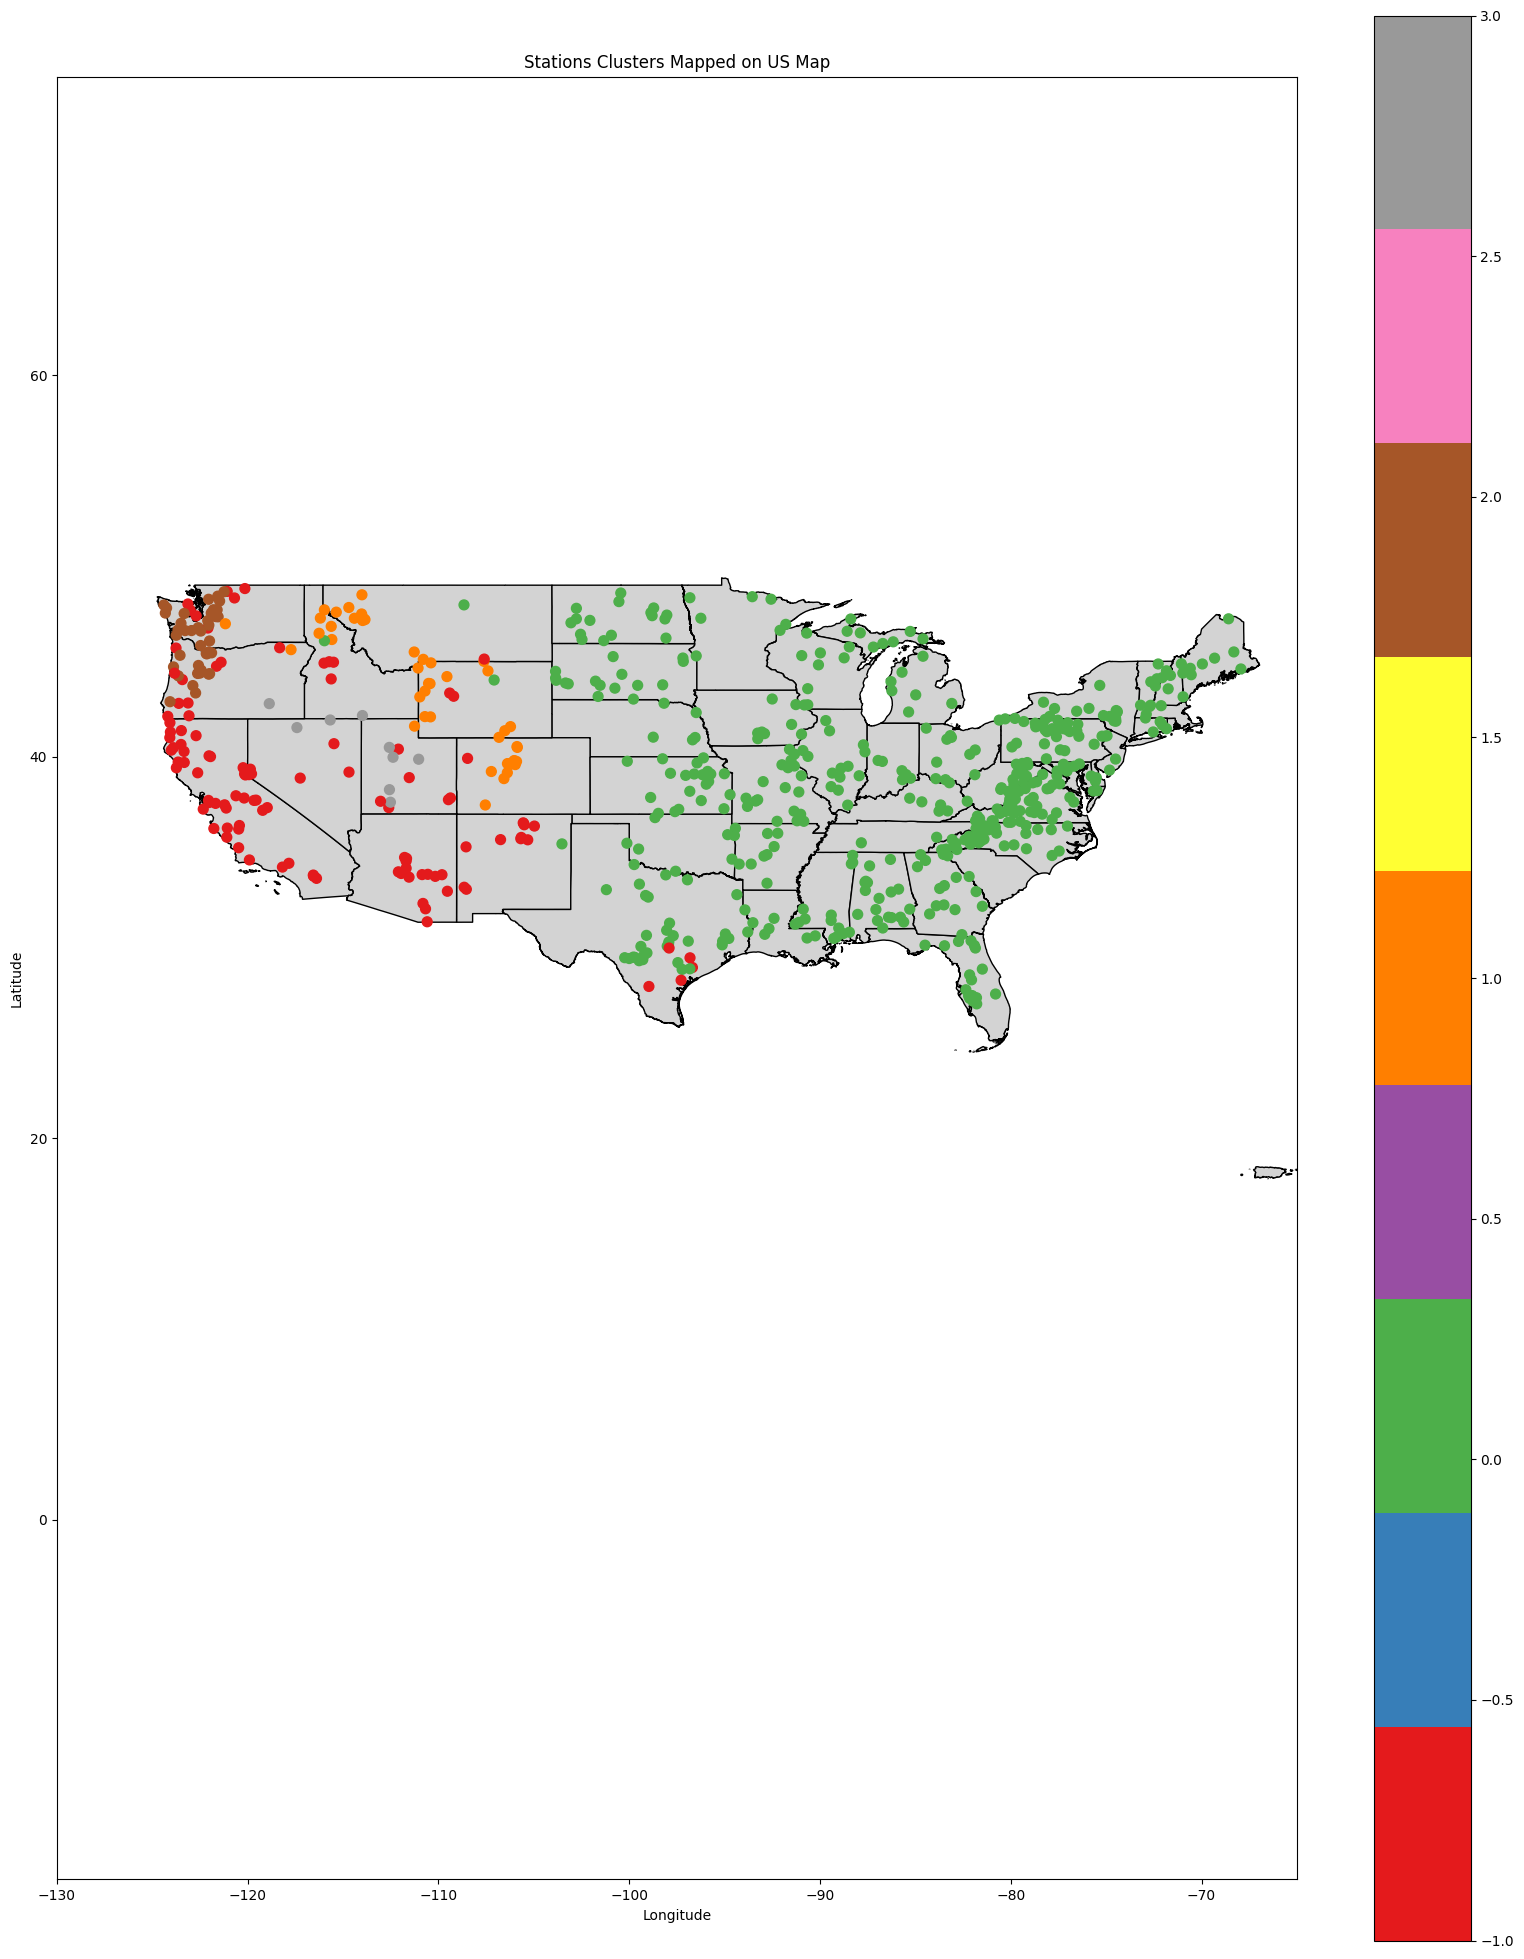

In [226]:
plotMap(df, 'DBSCAN_Cluster')